In [181]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
import itertools
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

# 1. Data overview

Let's first check the basics of the dataset - the rows, columns, datatypes and null values.

In [3]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
# check na values
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

The dataset is pretty clean and ready for the next steps - let's see how each column is distributed.

Administrative


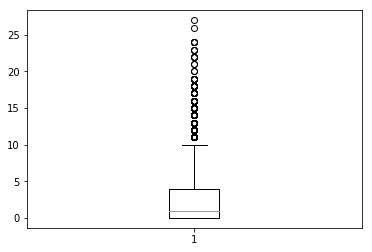

Administrative_Duration


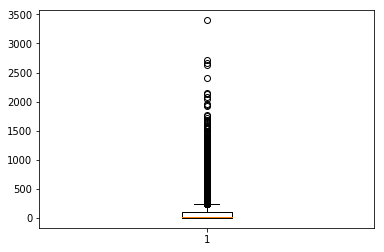

Informational


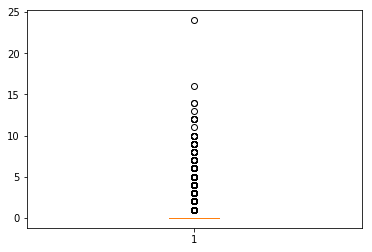

Informational_Duration


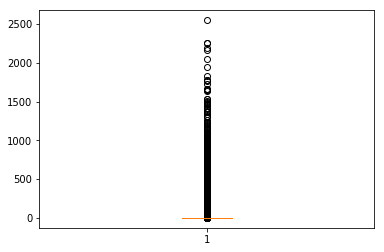

ProductRelated


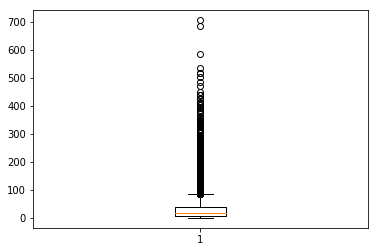

ProductRelated_Duration


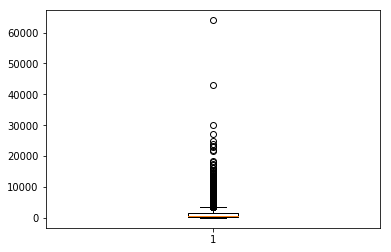

BounceRates


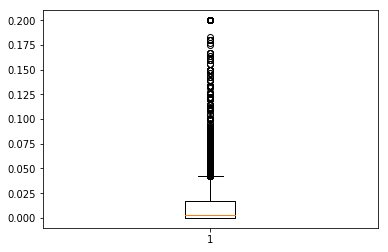

ExitRates


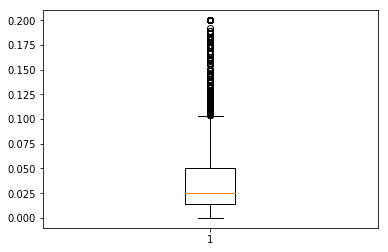

PageValues


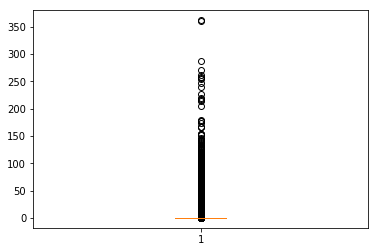

SpecialDay


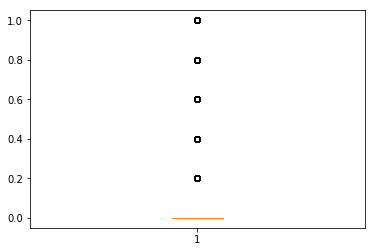

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


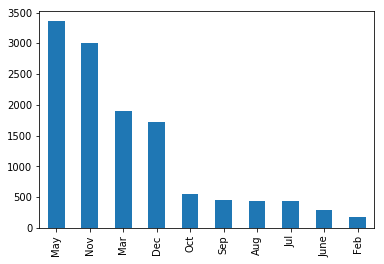

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


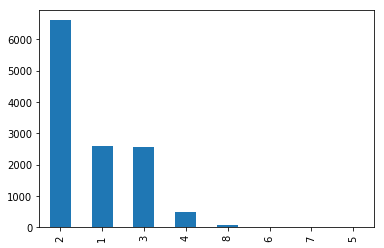

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


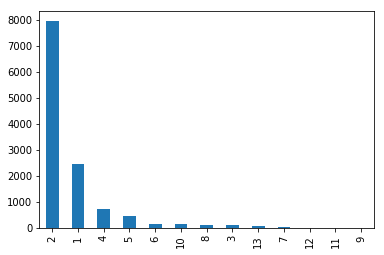

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64


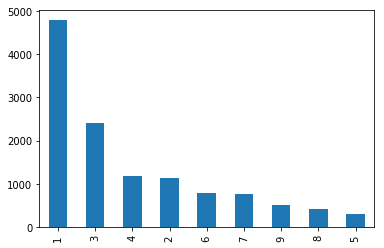

TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64


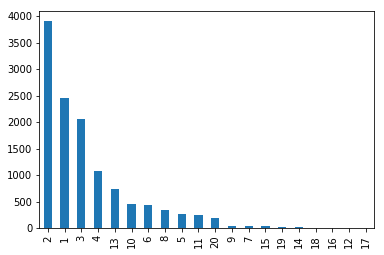

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


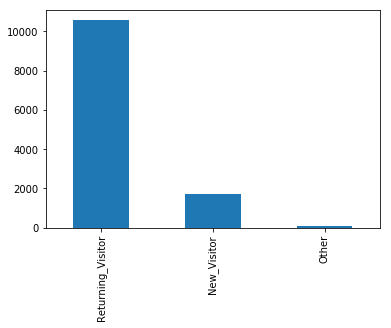

Weekend
False    9462
True     2868
Name: Weekend, dtype: int64


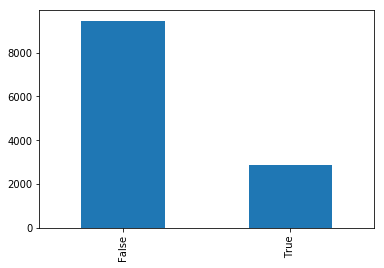

Revenue
False    10422
True      1908
Name: Revenue, dtype: int64


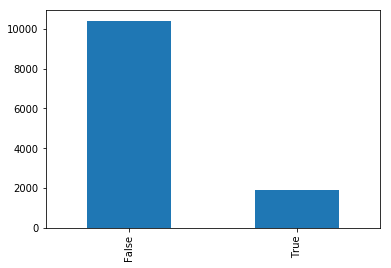

In [7]:
# type casting - bar charts for categorical columns, boxplots for numeric
cat_col = df.columns[10:16]
num_col = df.columns[0:10]
bin_col = df.columns[16:18]
for i in num_col:
    print (i)
    plt.boxplot(df[i])
    plt.show()
for i in cat_col:
    df[i] = df[i].astype("category")
    print (i)
    print (df[i].value_counts())
    df[i].value_counts().plot.bar()
    plt.show()
for i in bin_col:
    print (i)
    print (df[i].value_counts())
    df[i].value_counts().plot.bar()
    plt.show()


intersting findings: 
1. We see outliers existed in most numerical columns, especially those about page durations. It's unlikely that a person will have a session longer than hours, so we need to handle this outliers later.
2. For most categorical variables, there're some main groups, and a small number of data spreaded out in other groups. To avoid a sparse dataset after one hot encoding, we can group the small categories into one.
3. The positive class is about 15%. We may need to avoid using accuracy as an evaluation metrics, over-sample the minority class or do something else to handle the class imblance issue.

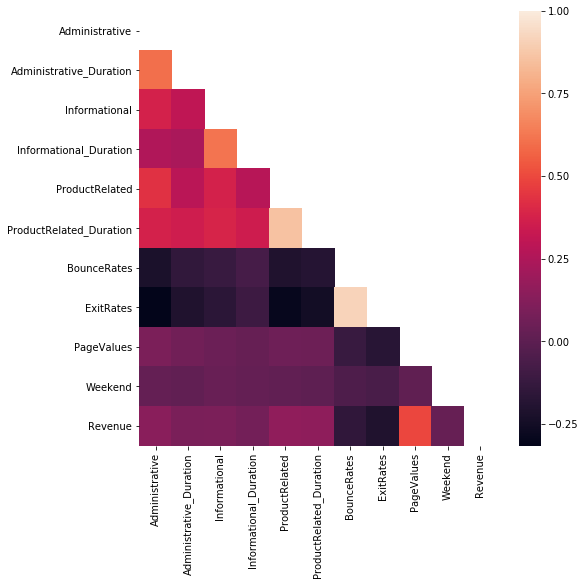

In [180]:
# check correlation
plt.figure(figsize=(8,8))
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),mask = mask)

In [9]:
df.corr()['Revenue']

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.095200
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492569
SpecialDay                -0.082305
Weekend                    0.029295
Revenue                    1.000000
Name: Revenue, dtype: float64

We can see the correlation as a bivariate analysis. The heatmap shows us:

1. the visited page types are correlated with the respective duration. The 3 sets of variables are all correlated among them. 
2. PageValues is the most positively correlated to the lable, Revenue. Bounce rate and Exit rate are the most negatively correlated factors.

It doesn't show us the impact of the categoical features, or how all the features interact with each other.

# 2. Modelling

## 2.1 outliers

In [10]:
new_df = df.copy()
# assign outliers to new values - q3+1.5*iqr
for i in ["Administrative","Administrative_Duration","ProductRelated","ProductRelated_Duration"]:
    cap = df[i].quantile(0.75)+(df[i].quantile(0.75)-df[i].quantile(0.25))
    new_df[i]=new_df[i].apply(lambda x: min(x, cap))
# for information and its duration, the iqr is rather small, so we can set the cap according to the visualization
new_df["Informational"] = new_df["Informational"].apply(lambda x: min(x, 20))
new_df["Informational_Duration"] = new_df["Informational_Duration"].apply(lambda x: min(x, 2000))


## 2.2  add new features

In [11]:
new_df["total_pages"] = new_df["Administrative"]+ new_df["ProductRelated"] + new_df["Informational"]
new_df["total_duration"] = new_df["Administrative_Duration"]+ new_df["ProductRelated_Duration"] + new_df["Informational_Duration"]

In [12]:
new_df["SpecialOrNot"] = np.where(new_df["SpecialDay"]>0,1,0)

In [13]:
new_df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_pages,total_duration,SpecialOrNot
0,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,1.0,0.000000,0
1,0.0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,2.0,64.000000,0
2,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,4,1,9,3,Returning_Visitor,False,False,1.0,0.000000,0
3,0.0,0.0,0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,3,2,2,4,Returning_Visitor,False,False,2.0,2.666667,0
4,0.0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3,3,1,4,Returning_Visitor,True,False,10.0,627.500000,0
5,0.0,0.0,0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2,2,1,3,Returning_Visitor,False,False,19.0,154.216667,0
6,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,2,4,3,3,Returning_Visitor,False,False,1.0,0.000000,1
7,1.0,0.0,0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,1,2,1,5,Returning_Visitor,True,False,1.0,0.000000,0
8,0.0,0.0,0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2,2,2,3,Returning_Visitor,False,False,2.0,37.000000,1
9,0.0,0.0,0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,...,2,4,1,2,Returning_Visitor,False,False,3.0,738.000000,1


## 2.3 grouping values in the categorical features
This reduces columns from 80 to about 50,and saves up computing resources and avoids possible noises in the corner cases. 

In [14]:
operating_systems_main_groups = list(new_df["OperatingSystems"].value_counts()[:5].index)
browser_main_groups = list(new_df["Browser"].value_counts()[:5].index)
region_main_groups = list(new_df["Region"].value_counts()[:5].index)
traffic_main_groups = list(new_df["TrafficType"].value_counts()[:5].index)

In [15]:
def group(x, lst):
    if x not in lst:
        return "Other"
    return x

In [16]:
new_df["OperatingSystems"] = new_df["OperatingSystems"].apply(lambda x:group(x,operating_systems_main_groups))
new_df["Browser"] = new_df["Browser"].apply(lambda x:group(x,browser_main_groups))
new_df["Region"] = new_df["Region"].apply(lambda x:group(x,region_main_groups))
new_df["TrafficType"] = new_df["TrafficType"].apply(lambda x:group(x,traffic_main_groups))


In [17]:
new_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_pages,total_duration,SpecialOrNot
0,0.0,0.0,0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,1.0,0.000000,0
1,0.0,0.0,0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,2.0,64.000000,0
2,0.0,0.0,0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,4,1,Other,3,Returning_Visitor,False,False,1.0,0.000000,0
3,0.0,0.0,0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,3,2,2,4,Returning_Visitor,False,False,2.0,2.666667,0
4,0.0,0.0,0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3,Other,1,4,Returning_Visitor,True,False,10.0,627.500000,0


## 2.4 One Hot Encoding
Lable encoder vs One hot encoder

In [18]:
# one hot encoding
df_ohe = pd.get_dummies(new_df)

In [19]:
df_ohe.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'total_pages', 'total_duration', 'SpecialOrNot', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_8', 'OperatingSystems_Other',
       'Browser_1', 'Browser_2', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_Other', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_6', 'Region_Other', 'TrafficType_1', 'TrafficType_2',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_13', 'TrafficType_Other',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [20]:
df_ohe.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region_Other,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_Other,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,0.0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
2,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1,0,0,1,0,0,0,0,0,1
3,0.0,0.0,0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
4,0.0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
5,0.0,0.0,0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
6,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,0,0,0,1,0,0,0,0,0,1
7,1.0,0.0,0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
8,0.0,0.0,0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,0,0,0,1,0,0,0,0,0,1
9,0.0,0.0,0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,...,0,0,1,0,0,0,0,0,0,1


## 2.5 Feature Selection
Remove some features that are highly colinear.


In [21]:
for i in df_ohe.columns:
    df_ohe[i] = df_ohe[i].astype("float64")
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 52 columns):
Administrative                   12330 non-null float64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null float64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null float64
ProductRelated_Duration          12330 non-null float64
BounceRates                      12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
SpecialDay                       12330 non-null float64
Weekend                          12330 non-null float64
Revenue                          12330 non-null float64
total_pages                      12330 non-null float64
total_duration                   12330 non-null float64
SpecialOrNot                     12330 non-null float64
Month_Aug                        12330 non-null flo

In [24]:
X = df_ohe.drop(columns = ['Revenue'])
columns = X.columns.tolist()
threshold = 5
dropped = True
remain_cols = columns.copy()
while dropped:
    dropped = False
    vif = [variance_inflation_factor(X[remain_cols].values, ix) for ix in range(len(remain_cols))]
    print (vif)
    max_vif = vif.index(max(vif))
    if (max(vif) > threshold):
        print('dropping \'' + remain_cols[max_vif] + '\' at index: ' + str(max_vif))
        remain_cols.pop(max_vif)
        #remain_cols = remain_cols.drop(X.columns[max_vif])
        dropped=True
print('Remaining variables:')
print(remain_cols)


[inf, inf, inf, inf, inf, inf, 6.790224458385259, 8.169854749632975, 1.0684559926423662, 6.63077933970925, 1.0647585467762306, inf, inf, 7.071558305887024, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
dropping 'Administrative' at index: 0
[inf, 2.874444700061761, inf, 269.335488570006, inf, 6.790224458385259, 8.169854749632975, 1.0684559926423665, 6.63077933970925, 1.0647585467762302, 296.7258733137268, inf, 7.071558305887018, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
dropping 'Administrative_Duration' at index: 0
[2.874444700061761, 16.294869765836964, 269.335488570006, 635.0080254855985, 6.790224458385259, 8.169854749632975, 1.0684559926423662, 6.63077933970925, 1.0647585467762304, 296.7258733137268, 724.0

[2.0604457563577125, 1.7425987207207772, 8.742271503768556, 7.735883308523828, 1.4350224030711665, 1.1590281887309692, 7.247393053848984, 1.3758717546155965, 7.866643694104642, 2.3097212981707083, 1.1893187821741629, 1.3150681599843639, 1.2323525933505792, 2.228593695540986, 4.336364350862545, 3.4824147702525408, 1.4045773166417166, 1.3382725479794872, 3.6888148948962374, 1.9783536245673432, 1.1807212199698318, 1.8395458481745843, 1.0169627817157092, 1.1523724328195706, 1.0854515559711575, 1.0326846937144292, 1.150864745721551, 1.2342469189510654, 1.4710639818073765, 1.2343818883550222, 1.1651543504378694, 1.437210680490758, 2.755300158256887, 1.7932802035420439, 1.5409184012344816, 1.3830394069622511, 1.9275045957045742, 1.3577131985088244, 1.8161771288929336]
dropping 'ProductRelated' at index: 2
[2.0394827542843843, 1.7406139269196939, 2.6973586652740997, 1.419691596819864, 1.1588714834193246, 7.243555837241812, 1.3731121863113378, 7.866582691242851, 2.297210330764805, 1.18921664039

## 2.6 splitting train test set and scaling

In [34]:
# prepare train, test and scale the data
y = df_ohe['Revenue']
X = df_ohe[remain_cols]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [35]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2.7 model fitting

In [36]:
# visualizations code from https://www.kaggle.com/kageyama/lgbm-online-shopper-s-eda-and-classification

def plot_confusion_matrix(truth, pred, classes, normalize=False, title=''):
    cm = confusion_matrix(truth, pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix', size=15)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.tight_layout()

precision:  0.2788393489030432
recall:  0.8259958071278826
              precision    recall  f1-score   support

         0.0       0.95      0.61      0.74      2606
         1.0       0.28      0.83      0.42       477

   micro avg       0.64      0.64      0.64      3083
   macro avg       0.61      0.72      0.58      3083
weighted avg       0.85      0.64      0.69      3083



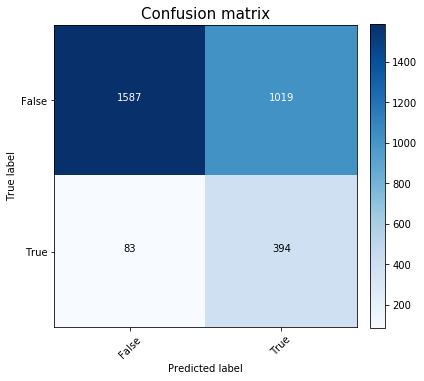

In [39]:
# Gaussian NB is a generative model, so we don't oversample here.
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
plot_confusion_matrix(y_test,y_pred, ['False','True'])

Very high recall rate - but also high false positive rate.

In [41]:
# oversample the minority class - for logreg and rfc, oversampling of the training data give them more positive incidence to learn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_scaled,y_train = sm.fit_sample(X_train_scaled,y_train.ravel())
pd.Series(y_train).value_counts()

1.0    7816
0.0    7816
dtype: int64

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


precision:  0.5440956651718983
recall:  0.7631027253668763
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.92      2606
         1.0       0.54      0.76      0.64       477

   micro avg       0.86      0.86      0.86      3083
   macro avg       0.75      0.82      0.78      3083
weighted avg       0.89      0.86      0.87      3083



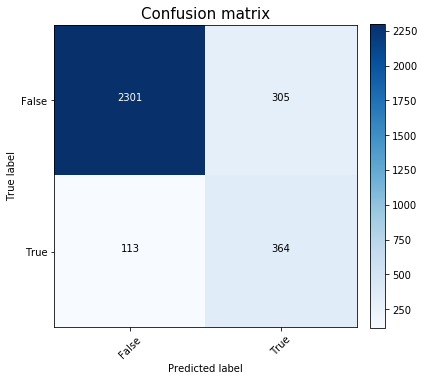

In [44]:
logreg = LogisticRegressionCV(scoring = 'f1', max_iter = 1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
plot_confusion_matrix(y_test,y_pred, ['False','True'])

precision:  0.6299638989169675
recall:  0.7316561844863732
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      2606
         1.0       0.63      0.73      0.68       477

   micro avg       0.89      0.89      0.89      3083
   macro avg       0.79      0.83      0.81      3083
weighted avg       0.90      0.89      0.90      3083



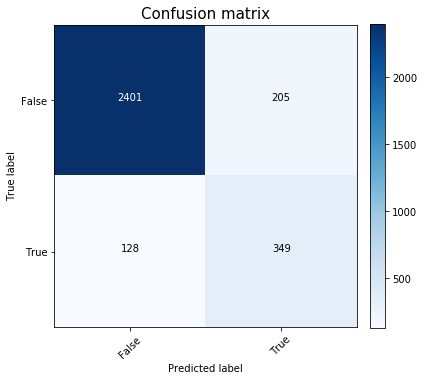

In [45]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train_scaled, y_train)
y_pred = rfc.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
plot_confusion_matrix(y_test,y_pred, ['False','True'])

Using the best performing rfc model, let's see how it predicts the conversion rate on the test population:

In [46]:
y_pred = rfc.predict(X_test_scaled)
print ("the predicted conversion rate is", y_pred.mean())
print ("the actual conversion rate is", y_test.mean())

the predicted conversion rate is 0.17969510217320792
the actual conversion rate is 0.15471942912747325


## 2.8 Model tuning

In [190]:
rfc = RandomForestClassifier()
param_to_tune = {
    "max_depth": [25,30,35,40],
    'n_estimators': [40,50,60,70,80,90,100],
    'criterion':['gini','entropy'],
    'max_features' : ['auto', 'sqrt'],
}
cv = GridSearchCV(rfc,param_grid = param_to_tune, scoring='f1', verbose = 1)
cv.fit(X_train_scaled, y_train)
best_rfc = cv.best_estimator_
print (cv.best_score_)
print (cv.best_params_)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed:  5.8min finished


0.9358167492411688
{'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 90}


In [191]:
best_rfc = cv.best_estimator_
print (cv.best_score_)
print (cv.best_params_)

0.9358167492411688
{'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 90}


precision:  0.6554934823091247
recall:  0.7025948103792415
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      2582
         1.0       0.66      0.70      0.68       501

   micro avg       0.89      0.89      0.89      3083
   macro avg       0.80      0.82      0.81      3083
weighted avg       0.90      0.89      0.89      3083



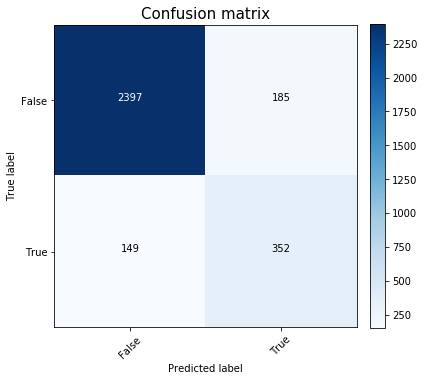

In [192]:
y_pred = best_rfc.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
plot_confusion_matrix(y_test,y_pred, ['False','True'])

Next, we can take a closer look at the factors and how the models weighs them:

In [47]:
coef = logreg.coef_[0]
# plt.figure(figsize=(20,20))
# plt.barh(y=X.columns,width = coef)
# plt.show()


top_10 = np.argsort(-np.absolute(coef))[:10]
for i in top_10:
    print ("%-25s %s" % ((X.columns[i], coef[i])))

PageValues                54.125334991161985
Month_Feb                 -4.004724898278861
BounceRates               -2.7936687548275123
Browser_6                 -1.6413133947822756
VisitorType_Other         -1.3744679940543683
Informational             1.3658560627843968
Month_May                 -1.26280793216913
ProductRelated_Duration   1.150256791062243
TrafficType_13            -0.9318137639997802
Month_June                -0.9152552538712176


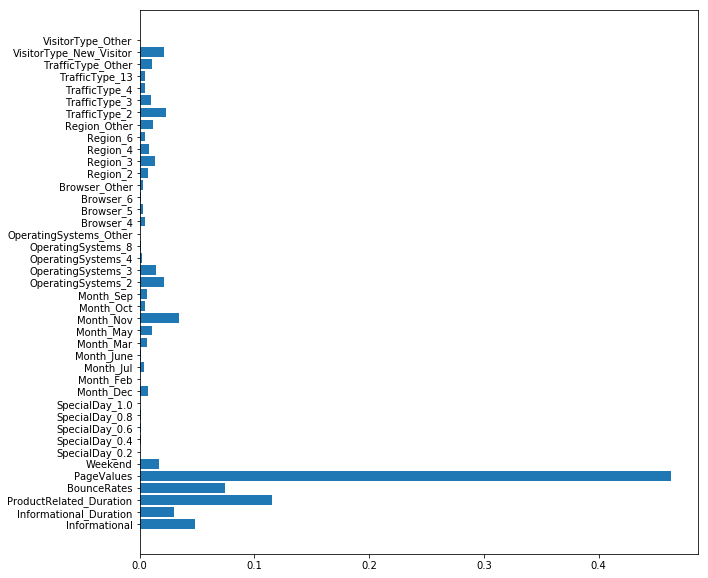

PageValues                0.4630535486320969
ProductRelated_Duration   0.11540482740023705
BounceRates               0.07440396045317675
Informational             0.04789635633609089
Month_Nov                 0.03399948065549778
Informational_Duration    0.0302658802513831
TrafficType_2             0.022828254718821613
VisitorType_New_Visitor   0.021675621487196914
OperatingSystems_2        0.021670405552655474
Weekend                   0.017355041472490573


In [193]:
#rfc = RandomForestClassifier(n_estimators = 100)
#rfc.fit(X_train_scaled, y_train)
y_pred = best_rfc.predict(X_test_scaled)
#print ("precision: ", precision_score(y_test,y_pred))
#print ("recall: ", recall_score(y_test,y_pred))
coef =  best_rfc.feature_importances_
plt.figure(figsize=(10,10))
plt.barh(y=X.columns,width = coef)
plt.show()


top_10 = np.argsort(-np.absolute(coef))[:10]
for i in top_10:
    print ("%-25s %s" % ((X.columns[i], coef[i])))